# Simple Autoencoder Network Model

## Train for 5 epochs

Observe the loss decreasing while training.

In [2]:
!python3 SimpleAutoEncoder.py --max_epochs=5

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name    | Type       | Params | In sizes        | Out sizes
---------------------------------------------------------------------
0 | encoder | Sequential | 109 K  | [64, 1, 28, 28] | [64, 3]  
1 | decoder | Sequential | 110 K  | [64, 3]         | [64, 784]
Epoch 0:  83%|█████████▏ | 782/939 [00:12<00:02, 60.22it/s, loss=0.042, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 0:  96%|██████████▌| 902/939 [00:15<00:00, 56.59it/s, loss=0.042, v_num=0]
Epoch 0: 100%|█| 939/939 [00:16<00:00, 56.86it/s, loss=0.042, v_num=0, val_loss=
Epoch 1:  83%|▊| 782/939 [00:16<00:03, 47.90it/s, loss=0.040, v_num=0, val_loss=
Validating: 0it [00:00, ?it/s]
Epoch 1:  87%|▊| 816/939 [00:19<00:02, 41.46it/s, loss=0.040, v_num=0, val_loss=
Epoch 1:  92%|▉| 867/939 [00:19<00:01, 43.76it/s, loss=0.040, v_num=0, val_loss=
Validating:  58%|█████████████████▍            | 91/157 [00:03<01:46,  1.61s/it]
Epoch 1: 100%|█| 939/939 [00:20<0

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs


In [3]:
!tensorboard --logdir=./lightning_logs

W0909 18:29:40.142149 123145443823616 plugin_event_accumulator.py:321] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0909 18:29:40.142300 123145443823616 plugin_event_accumulator.py:359] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [5]:
__import__("sys").path.append("..")
import utils
from SimpleAutoEncoder import SimpleAutoEncoder

model = utils.load_trained_model_for_evaluation(SimpleAutoEncoder, 0)
print(model)

SimpleAutoEncoder(
  (encoder): Sequential(
    (0): Flatten()
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=64, out_features=12, bias=True)
    (6): ReLU(inplace=True)
    (7): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Tanh()
  )
)


## Generate similar MNIST images

     Original image <----> Generated Image


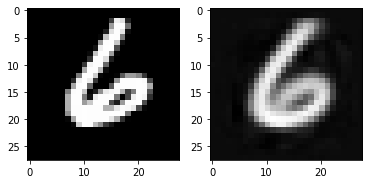

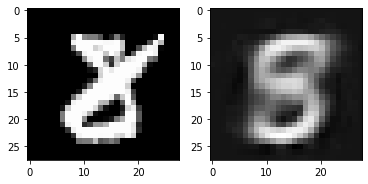

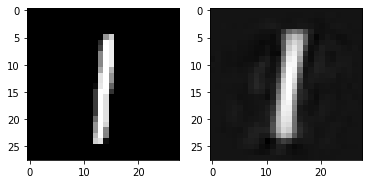

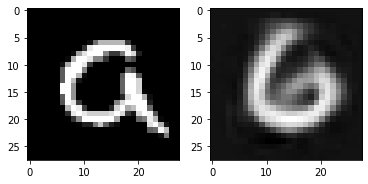

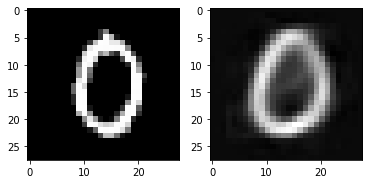

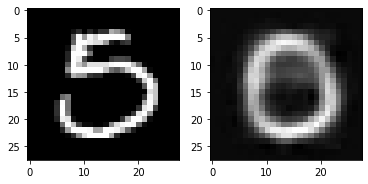

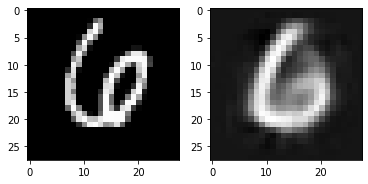

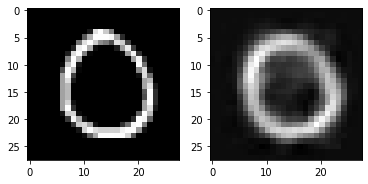

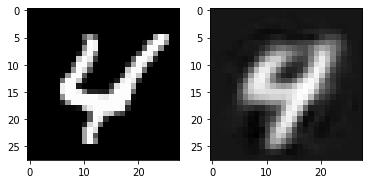

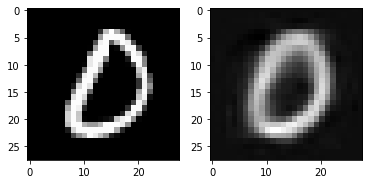

In [6]:
import torch
import random

test_len = model.mnist_test.data.shape[0]

print("     Original image <----> Generated Image")

for i in range(0, 10):
    orig_img, _ = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    predicted_img = model(orig_img).detach()
    utils.plot_images([orig_img.view(28, 28), predicted_img.view(28, 28)])